In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules,apriori

### 1.Đọc dữ liệu

In [9]:
df = pd.read_csv('bread basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
df.shape

(20507, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [9]:
print(df['Item'].unique())
print(df['Item'].unique().shape)


['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich' 'Extra

In [17]:
df['Transaction'].nunique()

9465

In [11]:
df.describe(include=object)

,Item,date_time,period_day,weekday_weekend
count,20507,20507,20507,20507
unique,94,9182,4,2
top,Coffee,05-02-2017 11:58,afternoon,weekday
freq,5471,12,11569,12807


## Kết luận :
    Dữ liệu có 20507 bản ghi, 5 cột
    có 94 sản phẩm khác nhau
    có 9465 giao dịch
    
    

# 2. Tiền Xử lý dữ liệu

In [6]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [7]:
# Thực hiện chuyển đổi định dạng chuỗi sang datetime
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
# Trích xuất thông tin tháng và năm để tạo các cột mới
df['Day']=df['date_time'].dt.day_name()
df['Month']=df['date_time'].dt.month_name()
df['Year'] = df['date_time'].dt.year
df

,Transaction,Item,date_time,period_day,weekday_weekend,Day,Month,Year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,Sunday,October,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,Sunday,October,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,Sunday,October,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,Sunday,October,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,Sunday,October,2016
...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,Sunday,April,2017
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,Sunday,April,2017
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,Sunday,April,2017
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,Sunday,April,2017


# 3. Khám phá dữ liệu

In [8]:

itemFrequency = df['Item'].value_counts().sort_values(ascending=False)
itemFrequency


Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

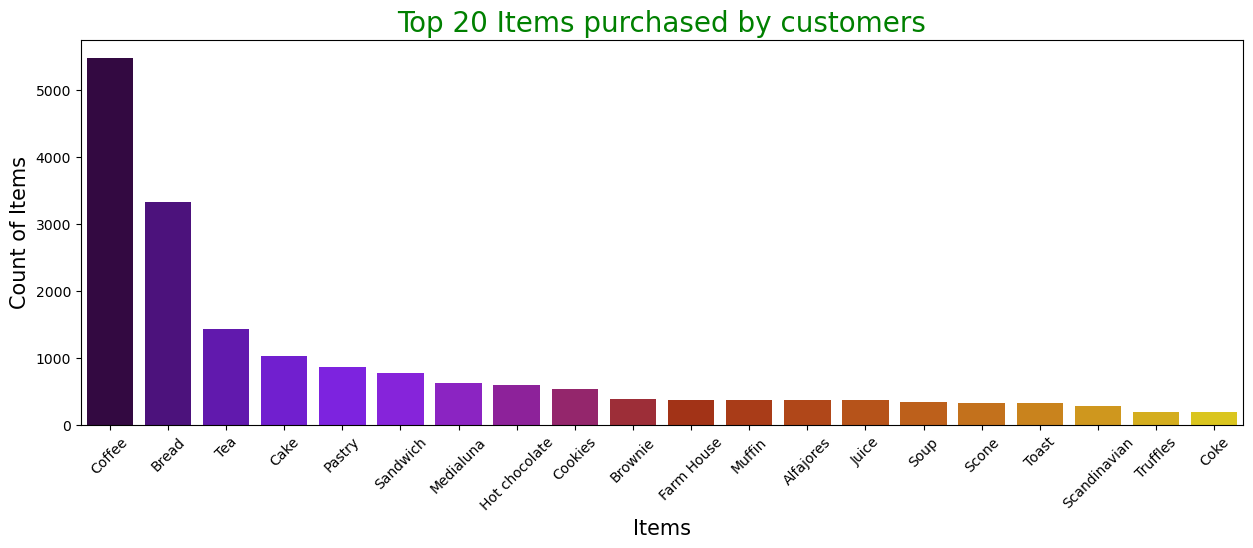

In [9]:
# top 20 sản phẩm bán chạy nhât


# top_20 = itemFrequency.sort_values(ascending=False).head(20)

# plt.figure(figsize=(10, 6))
# top_20.plot(kind='bar', color='skyblue')
# plt.xlabel('Sản phẩm')
# plt.ylabel('Số lượng bán')
# plt.title('Top 20 sản phẩm bán chạy nhất')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

 Coffee là món có số lượng mua vượt trội so với các sản phẩm khác

In [13]:
# thời gian được mua nhiều nhất
peakHours = df.groupby('period_day')['Item'].count().sort_values(ascending=False)
peakHours

period_day
afternoon    11569
morning       8404
evening        520
night           14
Name: Item, dtype: int64

In [ ]:
# Sơ đồ thời gian mua hàng

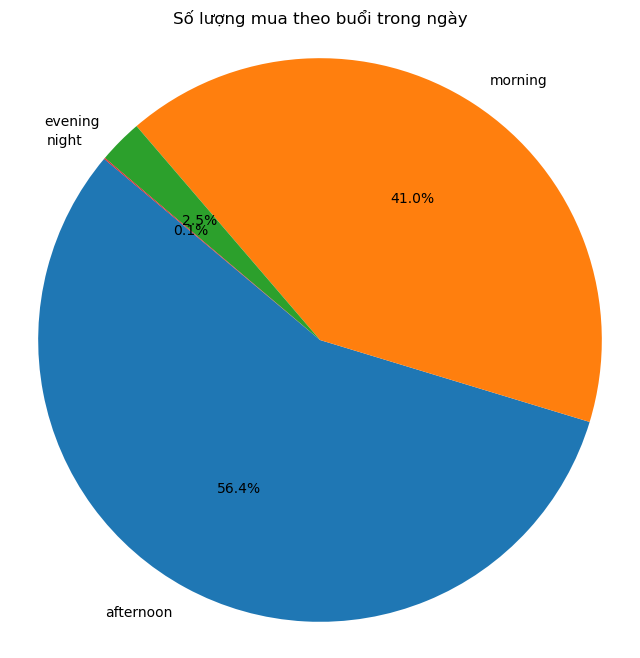

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(peakHours, labels=peakHours.index, autopct='%1.1f%%', startangle=140)
plt.title('Số lượng mua theo buổi trong ngày')
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()

mọi người thích mua hàng vào buổi chiều nhất

In [ ]:
# số lượng mua hàng các ngày trong tuần
mpd = df.groupby('Day')['Item'].count().sort_values(ascending=False)
mpd

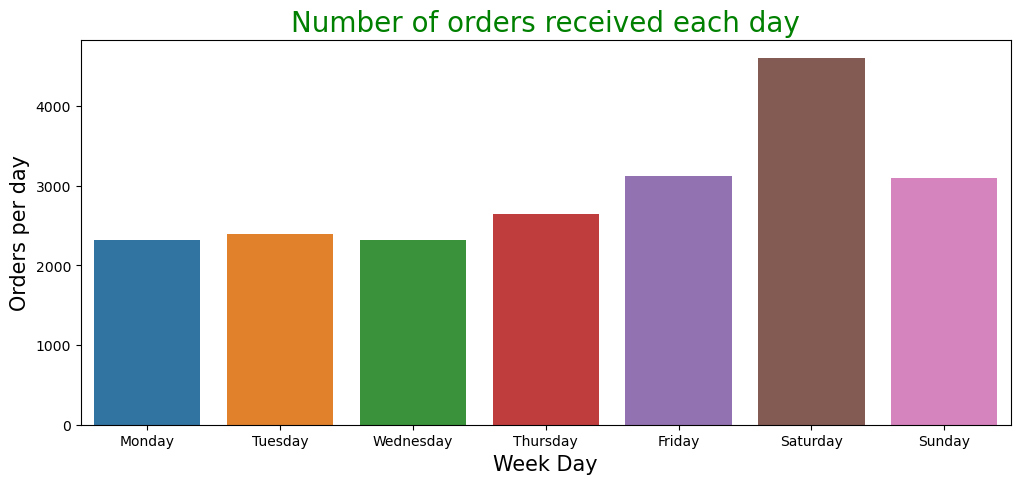

In [17]:
# ngày trong tuần bán chạy nhất


# plt.figure(figsize=(10, 6))
# bars = plt.bar(mpd.index, mpd.values, color='skyblue')

# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
# plt.xlabel('Ngày trong tuần')
# plt.ylabel('Số lượng bán')
# plt.title('Ngày trong tuần bán chạy nhất')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

weekTran = df.groupby('Day')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "Day", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

In [129]:
mpm = df.groupby(['Year','Month'])['Item'].count()

mpm

Year  Month   
2016  December    3339
      November    4436
      October      369
2017  April       1157
      February    3906
      January     3356
      March       3944
Name: Item, dtype: int64

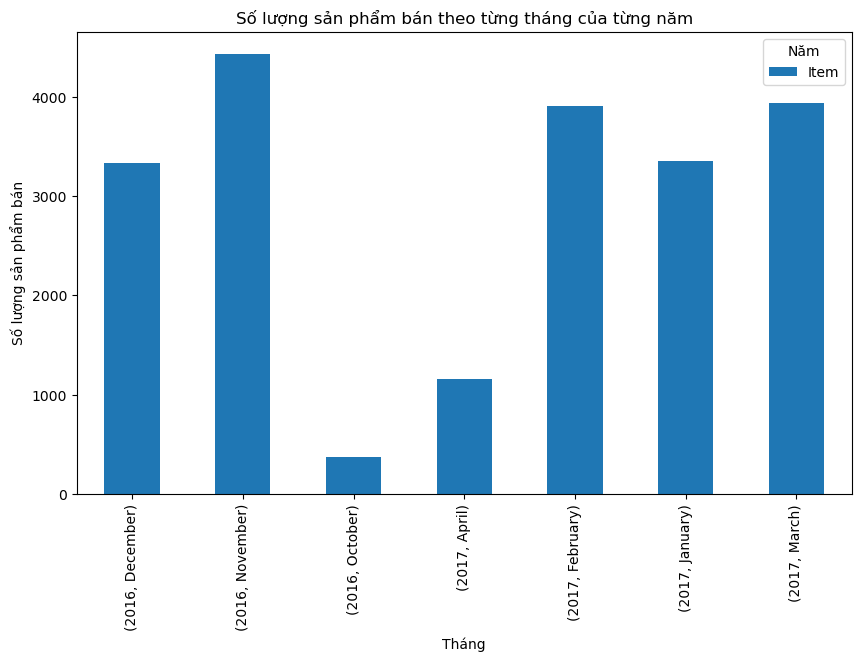

In [130]:
plt.figure(figsize=(10, 6))
mpm.plot(kind='bar', x='tháng', stacked=True, figsize=(10,6))
plt.title('Số lượng sản phẩm bán theo từng tháng của từng năm')
plt.xlabel('Tháng')
plt.ylabel('Số lượng sản phẩm bán')
plt.legend(title='Năm')
plt.show()

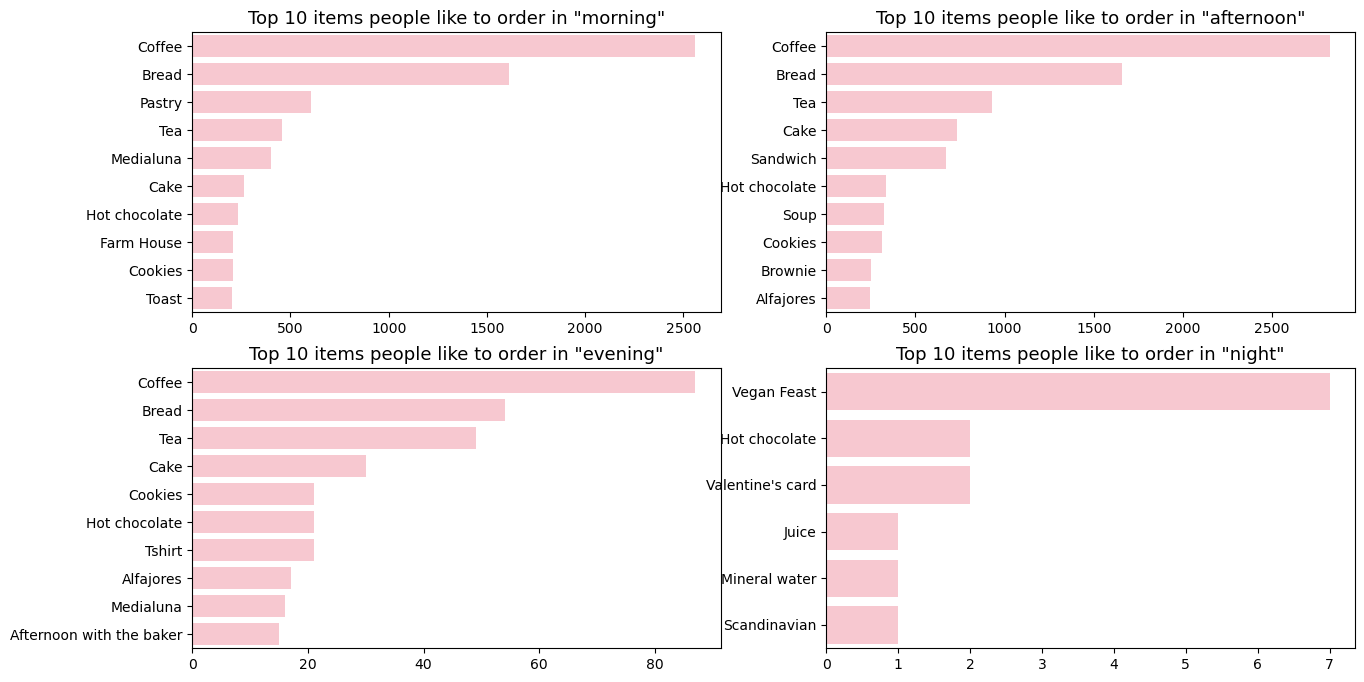

In [18]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

# 4. Luật kết hợp

In [10]:
# điếm số lượng sản phẩm được bán ở mỗi giao dịch
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str


,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [11]:
# tạo ma trận mxn trong đó m=giao dịch và n=mục và mỗi hàng biểu thị liệu mục đó có trong giao dịch hay không
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
my_basket.head()

# pivot_table: Hàm này từ thư viện pandas được sử dụng để tạo bảng pivot từ DataFrame transactions_str.
# index='Transaction': Thiết lập cột 'Transaction' làm chỉ mục hàng của bảng pivot. Điều này có nghĩa là bảng sẽ được nhóm theo giao dịch.
# columns='Item': Thiết lập cột 'Item' làm nhãn cột của bảng pivot. Điều này tạo ra các cột riêng cho mỗi mục duy nhất.
# values='Count': Chỉ định rằng các giá trị trong cột 'Count' nên được sử dụng để điền vào các ô bảng pivot.
# aggfunc='sum': Xác định hàm tổng hợp được áp dụng cho các giá trị 'Count' trong mỗi nhóm giao dịch. 
# fillna(0): thay thế bất kỳ giá trị NaN (Not a Number) nào bằng 0.

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# tạo hàm để tìm giá trị nào <=0 thì đưa về True , lớn hơn 0 thì đưa về False
def encode(x):
    if x<=0:
        return False
    if x>=1:
        return True
my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# sử dụng thuật toán apriori with min_support=0.01 (1% of 9465)
# Điều đó có nghĩa là mặt hàng đó phải xuất hiện trong ít nhất 94 giao dịch trong số 9465 giao dịch
# frequent itemset là tập phổ biến các mặt hàng hay nhóm mặt hàng có sup>=0.01
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Bread, Cake, Coffee)"
59,0.011199,"(Bread, Coffee, Pastry)"


In [19]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules

# frequent_items: Biến này chứa thông tin về tập phổ biến. 

# association_rules: Hàm này thường được tìm thấy trong các thư viện như mlxtend được sử dụng cho các nhiệm vụ khai phá dữ liệu.

# metric: Tham số này cho biết thước đo được sử dụng để đánh giá sức mạnh của các quy tắc liên kết. Trong trường hợp này, "lift" được sử dụng.

# min_threshold: Tham số này đặt một ngưỡng tối thiểu cho thước đo đã chọn (lift trong trường hợp này) để lọc các quy tắc được coi là thú vị.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553


In [18]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [21]:
rules.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
10,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556


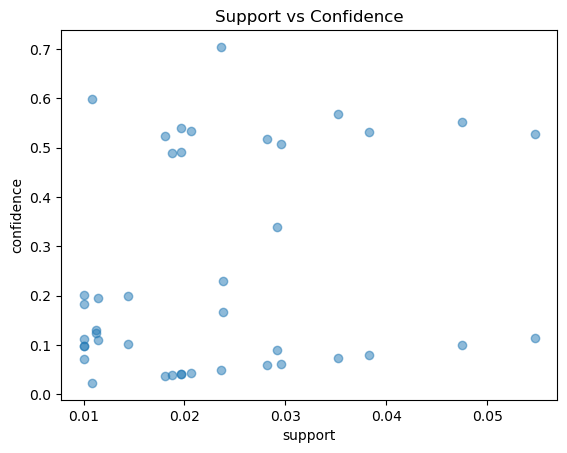

In [22]:
# SUPPORT Vs CONFIDENCE

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

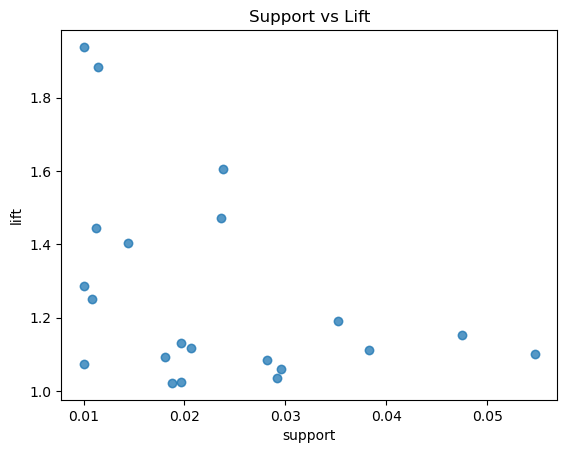

In [23]:
# SUPPORT Vs LIFT


plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

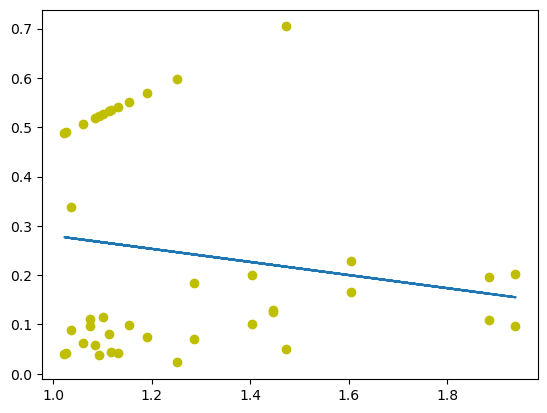

In [24]:
# LIFT Vs CONFIDENCE


fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# Kết luận

Trên cơ sở độ tin cậy (confidence) cao (được coi lớn hơn hoặc bằng 0,55), ta có quy tắc sau:

Toast → Coffee
Spanish Brunch → Coffee
Medialuna → Coffee
Pastry → Coffee
Cũng lưu ý rằng các quy tắc này có mức tăng (lift) > 1, nghĩa là các cặp đó có mối tương quan dương giữa chúng.

Người ta quan sát thấy rằng (Coffee, Tea) → (Cake) có mức tăng cao nhất là 1,93, điều này cho thấy chúng có mối tương quan cao giữa chúng. Ở đây mức tăng(Lift) 1,93 có nghĩa là khả năng một khách hàng mua tất cả cà phê, trà và bánh cùng nhau cao hơn 1,94 lần so với khả năng khách hàng chỉ mua một chiếc bánh.